# 1 Segment Influenza model
This is a test model for 1 segmented virus particle. Virus accumulates deleterious mutations that reduces selection coefficient, and the negative impact of the mutant allele is multiplicative.  

## Parameters
* N = Population size (N0 = initial population)
* K = Carrying capacity
* s = fitness decrease from deleterious mutation
* mu = mutation rate
* gen_num = generation amount

In [1]:
N0 = 5000
K = 5000
mu = 0.0007
gen_num = 500
N = N0
s = 0.05
L = 300

## Agent specific parameters

* k = number of deleterious mutation
* w = fitness
* seq = sequence vector

In [2]:
import numpy as np

class Virus():
    """
    This class produces objects which are single agents of a influenza virus.
    L = sequence length for a virus
    s = fitness decrease from deleterious mutation
    k = number of deleterious mutation
    w = fitness
    seq = sequence vector
    one_index = index of allele that is 1 (mutant)
    """
    def __init__(self,one_index,k):
        self.k = k 
        self.s = s
        self.L = L
        self.w = (1-self.s)**self.k
        self.seq = np.repeat(0,self.L)
        for i in one_index:
            self.seq[i] = 1
    
    def mutate(self,mu):
        """
        Mutation in sequence before reproduction
        mu = mutation rate
        """
        self.mutation_num = np.random.binomial(self.L,mu) # number of mutation
        mut_seq_index = np.random.randint(self.L, size = self.mutation_num) # pick which allele goes thru mutation
        for i in mut_seq_index:
            if self.seq[i] == 1: # back mutation allowed.
                self.seq[i] = 0
                self.k -= 1
            else: 
                self.seq[i] = 1
                self.k += 1

In [5]:
# reset parameters if needed
N0 = 5000
K = 5000
mu = 0.0007
gen_num = 1000
N = N0
s = 0.05
L = 300

Go through reproduction and mutation every generation

In [6]:
import timeit

start = timeit.default_timeer()

viruses = [Virus([],0) for i in range(0,N0)] # initialize population
pop = [N]
k_array = [list(np.repeat(0,N))] # record of k
f0_exp = []
f0_obs = []
for i in range(gen_num):
    ks = []
    next_gen = []
    for virus in viruses:
        virus.mutate(mu)
        progeny_n = np.random.poisson(virus.w*(2/(1+N/K))) # number of progeny for that virus
        for j in range(progeny_n):
            one_index = np.where(virus.seq == 1)[0]
            new_v = Virus(one_index, virus.k)
            ks.append(new_v.k)
            next_gen.append(new_v)
    viruses = next_gen
    N = len(viruses)
    f0_exp.append(N*np.exp(-L*mu/s))
    f0_obs.append(len(np.where(np.array(ks)==0)[0]))
    k_array.append(ks)
    pop.append(len(viruses)) # print population every generation

stop = timeit.default_timer()
print('simulation ran for %.2f min'%((start-stop)/60))

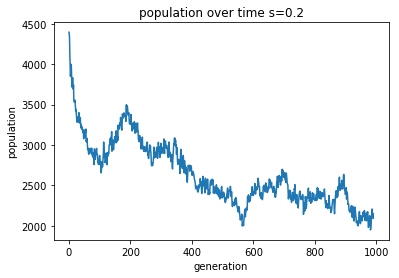

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(pop[10::]) # plot of population
plt.title('population over time s=0.2')
plt.xlabel('generation')
plt.ylabel('population')

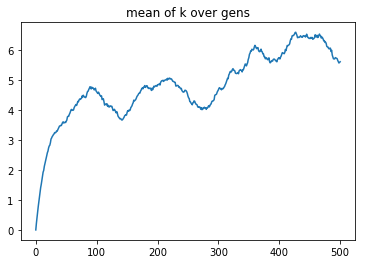

In [5]:
means = []
for array in k_array:
    means.append(np.mean(array))
plt.plot(means)
plt.title('mean of k over gens')

In [6]:
f0_obs = []
for ks in k_array:
    f0_obs.append(len(np.where(np.array(ks)==0)[0]))

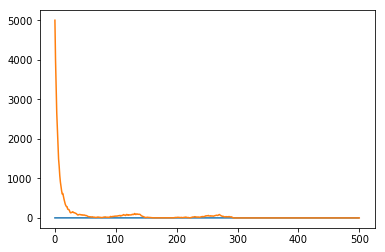

In [7]:
#f0_exp = np.array(f0_exp) * np.exp(-L*mu/s)/np.exp(-mu/s)
plt.plot(f0_exp) # blue
plt.plot(f0_obs) # orange

Todo:
- check: Muller's ratchet doesn't work under large population? And if it doesn't work, does frequency of wild-type viruses -follow f_0 = N*e^(-mu/s)?
- check: if the muller's ratchet does activate, does the histogram of mutation amount shift right as generation increases?

Yeongson's model as a benchmark:
- N = 10000
- L = 60
- gen_n = 50000